solid_at_Y=0.06_max_velocity:  1.3552801872707416 mm/s
air_at_Y=0.08_max_velocity:  16.743490600000086 mm/s
oil_at_Y=0.08_max_velocity:  5.147323489846117 mm/s


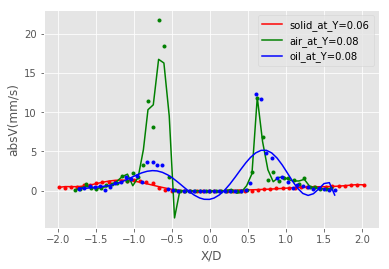

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
plt.style.use('ggplot')


def reg(data,mian_axis,value,count,fitnum,lintype,step):
    if mian_axis=="X":
        sub_axis="Y"
    else:
        sub_axis="X"
    poly_model = make_pipeline(PolynomialFeatures(fitnum),LinearRegression())
    df=pd.read_csv(data)
    df=df.drop(0)
    df=df.dropna(axis=1)
    df["Y"]=df["Y"].astype(float)
    df["Y"]=(df["Y"]*100).astype(int).astype(float)/100
    df["X"]=df["X"].astype(float)
    df["X"]=(df["X"]*100).astype(int).astype(float)/100
    df=df.set_index(mian_axis,drop=1)
    loc_index=df.index.unique()
    max_data=df[df.index==loc_index[count]]
    xlist=max_data[sub_axis].values
    step_total=int(50/step)
    new_xlist=xlist.reshape(step,step_total)
    ylist=max_data[value].values
    plt.plot(xlist,ylist,'.',color=lintype)
    ylist=ylist.reshape(step,step_total)
    data_type=data.split('.')
    yfit=np.ones(50)
    yfit=yfit.reshape(step,step_total)
    bspline_features = BSplineFeatures(50, degree=3, periodic=False)
    for i in range(step):
        poly_model.fit(new_xlist[i][:,np.newaxis],ylist[i])
        yfit[i]= poly_model.predict(new_xlist[i][:,np.newaxis])
        
        
    yfit=yfit.reshape(50,1) 
    plt.plot(xlist,yfit,lintype,label=data_type[0]+"_at_"+mian_axis+"="+str(loc_index[count]))
    print(data_type[0]+"_at_"+mian_axis+"="+str(loc_index[count])+'_max_velocity: ',abs(yfit).max(),"mm/s")
    #return yfit,ylist,xlist;

fig,ax=plt.subplots()
axis="Y"
if axis=="Y":
    axis2="X"
else:
    axis2="Y"

value="absV"    
reg("solid.csv",axis,value,1,10,'r',1)
reg("air.csv",axis,value,2,2,'g',10)
reg("oil.csv",axis,value,2,10,'b',1)
ax.set_xlabel(axis2+'/D')
ax.set_ylabel(value+'(mm/s)')
ax.legend()


